##### IMPORT DATA

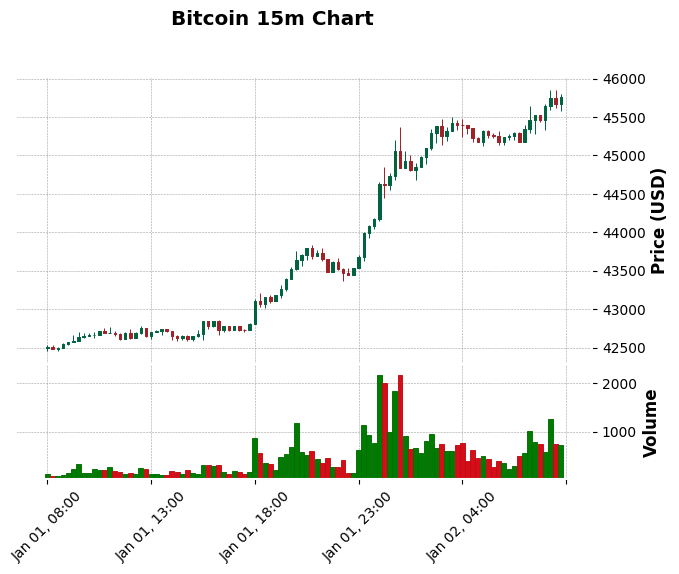

In [14]:
import pandas as pd
import mplfinance as mpf
import numpy as np

# Load the CSV file
df = pd.read_csv('./bitcoin_data_15m_2024.csv', parse_dates=['datetime'], index_col='datetime')

# Rename columns to match mplfinance requirements
df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)

# Specify the date range (modify 'start_date' and 'end_date' as needed)
start_date = '2024-01-01'
end_date = '2024-01-11'
df_filtered = df[start_date:end_date]

# Specify the number of charts to show (modify 'num_charts' as needed)
num_charts = 100
df_to_plot = df_filtered.head(num_charts)

# Plotting the data
mpf.plot(df_to_plot, type='candle', style='charles', volume=True, title="Bitcoin 15m Chart", ylabel='Price (USD)')

##### INDICATORS

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


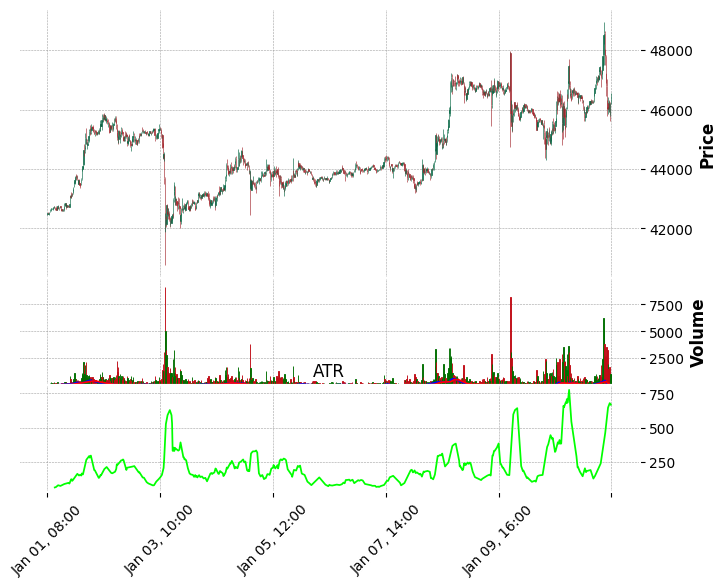

In [17]:

# Calculate ATR
high_low = df['High'] - df['Low']
high_close = np.abs(df['High'] - df['Close'].shift())
low_close = np.abs(df['Low'] - df['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
atr = true_range.rolling(window=14).mean()  # 14-day ATR

# Calculate MACD
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
signal = macd.ewm(span=9, adjust=False).mean()


# Create an additional plot for ATR only
atr_plot = mpf.make_addplot(df['ATR'], type='line', ylabel='ATR')

# Plot the ATR on a separate figure
mpf.plot(df, type='line', addplot=atr_plot, figratio=(10, 5), figscale=1.2, title='ATR Chart', ylabel='ATR Value')
